# ROC AUC และ Threshold

ระบบ ML ที่ทำงานในลักษณะ Classification ต้องใช้ค่า ๆ หนึ่งเป็นเกณฑ์ในการตัดสิน เรียกว่า Threshold ซึ่งเป็นตัวกำหนดว่าจะให้ระบบทำงานแข็งหรืออ่อน\
เช่น ระบบสแกนใบหน้าในโครงการชิมช้อปใช้ ช่วงแรก ๆ ปชช. สแกนไม่ค่อยผ่าน ต้องไปที่ธนาคาร ต่อมามีการตั้งระบบให้อ่อนลง(ตั้ง Threshold ให้อ่อนลง) ทำให้ระบบสแกนยอมรับใบหน้าง่ายขึ้น

In [1]:
#ชุดข้อมูลมะเร็งเต้านม ได้จากข้อมูลภาพของชิ้นเนื้อที่ดูดแล้วนำไปตรวจ
#มี 30 ตัวแปร เช่น รัศมีเฉลี่ย(mean radius) ค่า sd Pixel ค่าความเรียบ และอื่น ๆ
#มี 2 Class คือ 0(ไม่เป็นมะเร็ง) และ 1(เป็นมะเร็ง)

from sklearn.datasets import load_breast_cancer

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()
cancer.keys() #ดูคีย์ว่ามีอะไรบ้าง

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
#ต้องใช้ data(ข้อมูล) และ feature_names(ชื่อ Features ซึ่งก็คือชื่อตัวแปรหรือชื่อคอลัมน์)
#เก็บไว้ใน df
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)   #ข้อมูลและชื่อตัวแปร
df['class'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

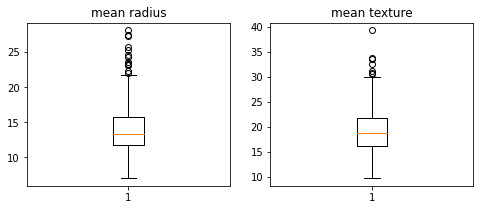

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3)) #กำหนดให้พล็อต 2 กราฟ คู่กัน
ax1.set_title('mean radius')                            #พล็อตดู Outlier
ax1.boxplot(df['mean radius'])

ax2.set_title('mean texture')
ax2.boxplot(df['mean texture'])
plt.show()

In [6]:
#ใช้ Features 2 ตัวแปร คือ mean radius และ mean texture
df = df[df['mean radius']<25]
df = df[df['mean texture']< 38]
df.shape

(563, 31)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


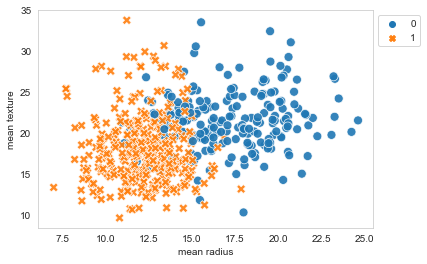

In [7]:
#scatter plot
sns.set_style('whitegrid')  #พื้นสีขาว

sns.scatterplot('mean radius','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)  #ขนาดกราฟ

plt.grid(False)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1)) 

plt.show()

In [8]:
#Case 1 ROC AUC ของ Model ดีที่สุด 
#แสดงให้เห็นว่า Model ที่แม่นยำ 100% มีลักษณะข้อมูลและ ROC, AUC อย่างไร
#แต่ง dataset ให้กลุ่มผู้เป็นมะเร็งแยกจากกลุ่มที่ไม่เป็น
#ใช้ mean ra แทน mean radius (เป็นข้อมูลสมมติ ให้เข้าใจ ROC, AUC ได้ง่ายขึ้น)


df['mean ra'] = np.where(df['class']==0, df['mean radius'] + 7.5, df['mean radius'])
df['mean ra'].head()

0    25.49
1    28.07
2    27.19
3    18.92
4    27.79
Name: mean ra, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


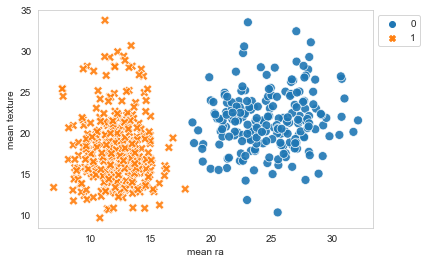

In [9]:
#scatter, distplot

sns.scatterplot('mean ra','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


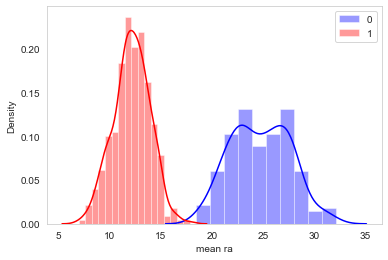

In [10]:

sns.distplot(df['mean ra'][df['class']==0], label='0', color='b')
sns.distplot(df['mean ra'][df['class']==1], label='1', color='r')
plt.legend()
plt.grid(False)
plt.show()

In [11]:
#ใช้ 2 ตัวแปร เก็บไว้ใน X ส่วน class เก็บไว้ใน y
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()

((563, 2), (563,), array([0, 1]))

In [12]:
X[:3]

,mean ra,mean texture
0,25.49,10.38
1,28.07,17.77
2,27.19,21.25


In [14]:
#Train & Test
#Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print("Score: {:.3f}".format(model.score(X_test, y_test))) 

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No','Yes']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score: 1.000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        63
         Yes       1.00      1.00      1.00       106

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169

[[ 63   0]
 [  0 106]]


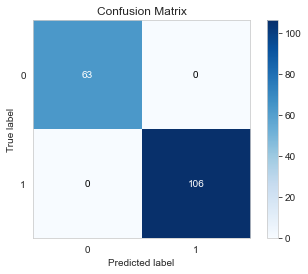

In [16]:
#แสดง confusion matrix
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [17]:
#10-fold Cross Validation

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = LogisticRegression(solver='lbfgs')

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average (%) = 100.00


In [18]:
#พล็อต ROC curve และหาค่า AUC (พื้นที่ใต้เส้น ROC)
#ต้องใช้ค่าความน่าจะเป็ฯที่ได้จากการทำนาย (ใช้ model.predict_proba())
#ถ้า Decision Tree ให้กำหนด max_depth ด้วย 

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test) # predict ด้วย .predict_proba
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])   #ค่าที่ใช้พล็อต ROC
y_pred_prob[:10].round(3)  #ดูข้อมูล y_pred_prob

array([[0.001, 0.999],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.903, 0.097],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ]])

In [19]:
#นำค่า y จริง(y_test) กับผลทำนาย (y_pred) และค่าความน่าจะเป็น มาเก็บไว้ใน DataFrame เพื่อเปรียบเทียบ 
#โดยค่าความน่าจะเป็น y_pred_prob จะ มี 2 คอลัมน์ คือความน่าจะเป็นที่ผลทำนายออกมาเป็น 0 และ 1

df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred 
df_result['y_pred_prob0'] = y_pred_prob[:,0]  #ความน่าจะเป็น ของผลทำนาย Negative
df_result['y_pred_prob1'] = y_pred_prob[:,1]  #ความน่าจะเป็น ของผลทำนาย Positive

df_result.head().round(3)

,class,y_pred,y_pred_prob0,y_pred_prob1
395,1,1,0.001,0.999
266,1,1,0.000,1.000
460,0,0,1.000,0.000
293,1,1,0.000,1.000
78,0,0,1.000,0.000


In [20]:
#y_pred_prob0 ค่าสูง หมายถึงมั่นใจว่า class=0
#y_pred_prob1 ค่าสูง หมายถึงมั่นใจว่า class=1 
#y_pred_prob0 + y_pred_prob1 = 1 (ฝั่งใดค่ามาก อีกฝั่งค่าจะน้อย)  

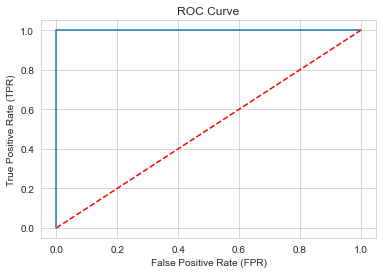

In [21]:
#พล็อต ROC Curve จะได้ดังรูป 7 ขวา เส้น ROC ชิดบนสุด และ AUC = 1 แสดงว่า Model นี้ แม่นยำ 100%
from sklearn.metrics import roc_curve, auc
%matplotlib inline
ll=[0,1]
ur=[0,1]

y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr) #, label="AUC={:.2f}".format(a))
plt.plot(ll,ur, '--r' )   # color red
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [23]:
#หาพื้นที่ใต้เส้น ROC Curve 
auc = auc(fpr, tpr)
auc

1.0

In [24]:
#Case2 Model แม่น 88%

df['mean ra'] = df['mean radius']
df['mean ra'].head(3)

0    17.99
1    20.57
2    19.69
Name: mean ra, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


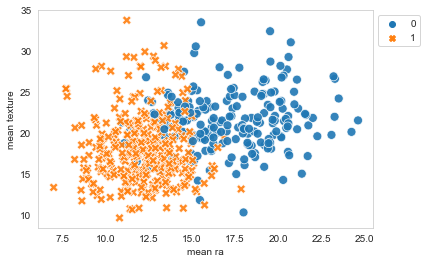

In [26]:
#Data Viz

sns.scatterplot('mean ra','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


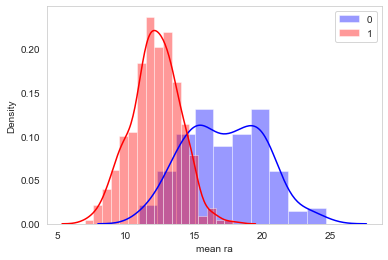

In [27]:
sns.distplot(df['mean ra'][df['class']==0], label='0', color='b')
sns.distplot(df['mean ra'][df['class']==1], label='1', color='r')
plt.legend()
plt.grid(False)
plt.show()

In [28]:
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()

((563, 2), (563,), array([0, 1]))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print("Score: {:.3f}".format(model.score(X_test, y_test))) 

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No','Yes']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score: 0.911
              precision    recall  f1-score   support

          No       0.94      0.81      0.87        63
         Yes       0.90      0.97      0.93       106

    accuracy                           0.91       169
   macro avg       0.92      0.89      0.90       169
weighted avg       0.91      0.91      0.91       169

[[ 51  12]
 [  3 103]]


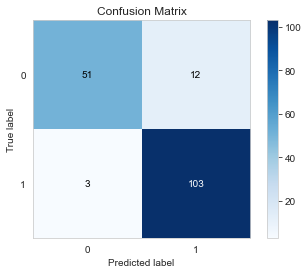

In [31]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = LogisticRegression(solver='lbfgs')

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [0.84 0.86 0.89 0.86 0.88 0.88 0.95 0.93 0.93 0.86]
Average (%) = 88.64


In [33]:
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test) # predict ด้วย .predict_proba
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])   #ค่าที่ใช้พล็อต ROC
y_pred_prob[:10].round(3)  #ดูข้อมูล y_pred_prob

array([[0.225, 0.775],
       [0.013, 0.987],
       [0.978, 0.022],
       [0.033, 0.967],
       [0.998, 0.002],
       [0.999, 0.001],
       [0.034, 0.966],
       [0.702, 0.298],
       [0.51 , 0.49 ],
       [0.053, 0.947]])

In [34]:
df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred 
df_result['y_pred_prob0'] = y_pred_prob[:,0]  #ความน่าจะเป็น ของผลทำนาย Negative
df_result['y_pred_prob1'] = y_pred_prob[:,1]  #ความน่าจะเป็น ของผลทำนาย Positive

df_result.head().round(3)

,class,y_pred,y_pred_prob0,y_pred_prob1
395,1,1,0.225,0.775
266,1,1,0.013,0.987
460,0,0,0.978,0.022
293,1,1,0.033,0.967
78,0,0,0.998,0.002


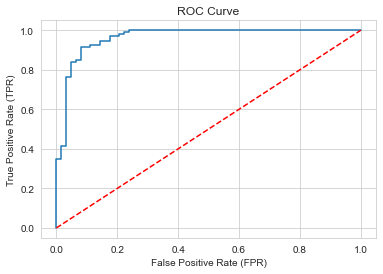

In [35]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
ll=[0,1]
ur=[0,1]

y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr) #, label="AUC={:.2f}".format(a))
plt.plot(ll,ur, '--r' )   # color red
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [36]:
auc = auc(fpr, tpr)
auc

0.9634621144055106

In [37]:
#Case 3 Model แม่นยำ 70%

df['mean ra'] = np.where(df['class']==0, df['mean radius'] - 5, df['mean radius'])
df['mean ra'].head(3)

0    12.99
1    15.57
2    14.69
Name: mean ra, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


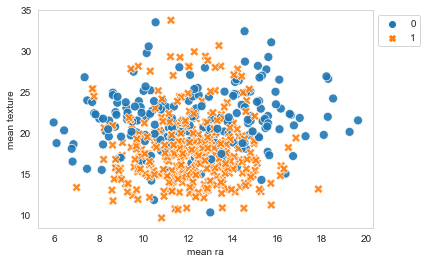

In [38]:

sns.scatterplot('mean ra','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


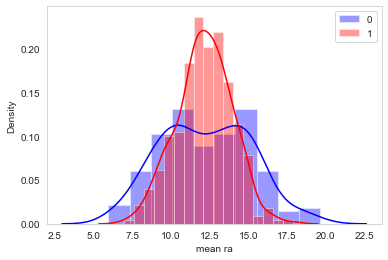

In [39]:
sns.distplot(df['mean ra'][df['class']==0], label='0', color='b')
sns.distplot(df['mean ra'][df['class']==1], label='1', color='r')
plt.legend()
plt.grid(False)
plt.show()

In [40]:
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()

((563, 2), (563,), array([0, 1]))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print("Score: {:.3f}".format(model.score(X_test, y_test))) 

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No','Yes']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score: 0.716
              precision    recall  f1-score   support

          No       0.69      0.43      0.53        63
         Yes       0.72      0.89      0.80       106

    accuracy                           0.72       169
   macro avg       0.71      0.66      0.66       169
weighted avg       0.71      0.72      0.70       169

[[27 36]
 [12 94]]


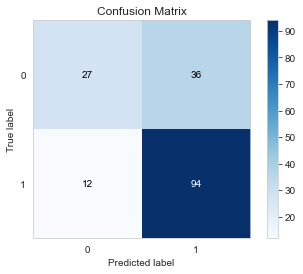

In [43]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = LogisticRegression(solver='lbfgs')

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [0.74 0.74 0.72 0.61 0.77 0.77 0.79 0.61 0.77 0.46]
Average (%) = 69.61


In [45]:
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test) # predict ด้วย .predict_proba
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])   #ค่าที่ใช้พล็อต ROC
y_pred_prob[:10].round(3)  #ดูข้อมูล y_pred_prob

array([[0.242, 0.758],
       [0.346, 0.654],
       [0.753, 0.247],
       [0.268, 0.732],
       [0.577, 0.423],
       [0.8  , 0.2  ],
       [0.336, 0.664],
       [0.62 , 0.38 ],
       [0.27 , 0.73 ],
       [0.238, 0.762]])

In [46]:
df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred 
df_result['y_pred_prob0'] = y_pred_prob[:,0]  #ความน่าจะเป็น ของผลทำนาย Negative
df_result['y_pred_prob1'] = y_pred_prob[:,1]  #ความน่าจะเป็น ของผลทำนาย Positive

df_result.head().round(3)

,class,y_pred,y_pred_prob0,y_pred_prob1
395,1,1,0.242,0.758
266,1,1,0.346,0.654
460,0,0,0.753,0.247
293,1,1,0.268,0.732
78,0,0,0.577,0.423


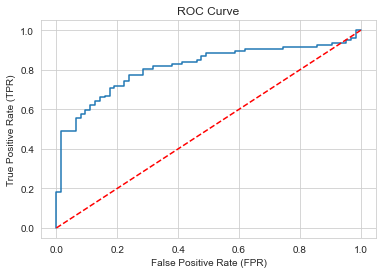

In [47]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
ll=[0,1]
ur=[0,1]

y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr) #, label="AUC={:.2f}".format(a))
plt.plot(ll,ur, '--r' )   # color red
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [48]:
auc = auc(fpr, tpr)
auc

0.8129679544773883

In [49]:
#Case 4 Model ที่แย่

idx = df[df['class'] == 1 ].index
df.drop(idx, axis=0, inplace=True)
print(df.shape)
df2 = df.copy()
df2['class'] = 1
df2.head()
df = df.append(df2, ignore_index=True)
df['mean ra'] = np.where(df['class']==0, df['mean radius'] +1 , df['mean radius'])
df.shape

(206, 32)


(412, 32)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


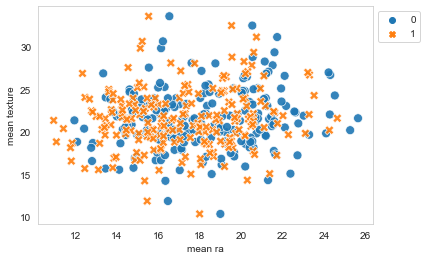

In [50]:
sns.scatterplot('mean ra','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


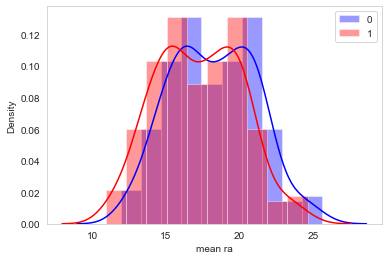

In [51]:
sns.distplot(df['mean ra'][df['class']==0], label='0', color='b')
sns.distplot(df['mean ra'][df['class']==1], label='1', color='r')
plt.legend()
plt.grid(False)
plt.show()

In [52]:
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()

((412, 2), (412,), array([0, 1], dtype=int64))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print("Score: {:.3f}".format(model.score(X_test, y_test))) 

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No','Yes']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score: 0.508
              precision    recall  f1-score   support

          No       0.54      0.43      0.48        65
         Yes       0.49      0.59      0.53        59

    accuracy                           0.51       124
   macro avg       0.51      0.51      0.51       124
weighted avg       0.51      0.51      0.51       124

[[28 37]
 [24 35]]


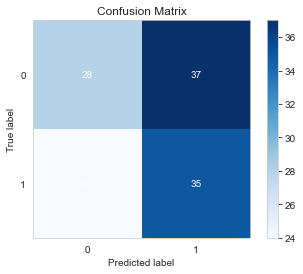

In [55]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = LogisticRegression(solver='lbfgs')

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [0.5  0.52 0.54 0.51 0.59 0.61 0.59 0.51 0.59 0.51]
Average (%) = 54.63


In [57]:
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test) # predict ด้วย .predict_proba
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])   #ค่าที่ใช้พล็อต ROC
y_pred_prob[:10].round(3)  #ดูข้อมูล y_pred_prob

array([[0.298, 0.702],
       [0.541, 0.459],
       [0.663, 0.337],
       [0.387, 0.613],
       [0.66 , 0.34 ],
       [0.396, 0.604],
       [0.361, 0.639],
       [0.352, 0.648],
       [0.474, 0.526],
       [0.477, 0.523]])

In [58]:
df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred 
df_result['y_pred_prob0'] = y_pred_prob[:,0]  #ความน่าจะเป็น ของผลทำนาย Negative
df_result['y_pred_prob1'] = y_pred_prob[:,1]  #ความน่าจะเป็น ของผลทำนาย Positive

df_result.head().round(3)

,class,y_pred,y_pred_prob0,y_pred_prob1
81,0,1,0.298,0.702
247,1,0,0.541,0.459
1,0,0,0.663,0.337
170,0,1,0.387,0.613
341,1,0,0.660,0.340


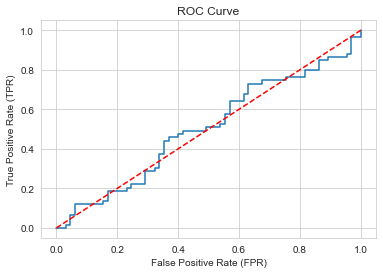

In [59]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
ll=[0,1]
ur=[0,1]

y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr) #, label="AUC={:.2f}".format(a))
plt.plot(ll,ur, '--r' )   # color red
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [60]:
auc = auc(fpr, tpr)
auc

0.5022164276401564

In [61]:
y_pred = model.predict(X_test)

In [74]:
#กำหนด Threshold สำหรับ Model

from sklearn.datasets import load_breast_cancer

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()

In [75]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df['class'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


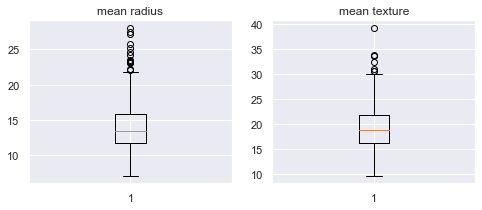

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

ax1.set_title('mean radius')
ax1.boxplot(df['mean radius'])

ax2.set_title('mean texture')
ax2.boxplot(df['mean texture'])
plt.show()

In [77]:
df = df[df['mean radius'] < 25]
df = df[df['mean texture'] < 38]
df.shape

(563, 31)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


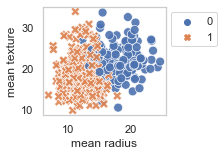

In [78]:
sns.set_style('whitegrid')

sns.scatterplot('mean radius','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1)) 

plt.show()

In [79]:
#ลองกำหนด Threshold
df['mean ra'] = df['mean radius']
df['mean ra'].head(3)

0    17.99
1    20.57
2    19.69
Name: mean ra, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


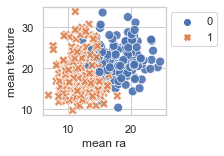

In [80]:
sns.scatterplot('mean ra','mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

In [81]:
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()

((563, 2), (563,), array([0, 1]))

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

              precision    recall  f1-score   support

          No       1.00      0.76      0.86        63
         Yes       0.88      1.00      0.93       106

    accuracy                           0.91       169
   macro avg       0.94      0.88      0.90       169
weighted avg       0.92      0.91      0.91       169

[[ 48  15]
 [  0 106]]


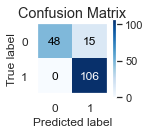

In [84]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)


threshold = .34                                   #ตั้งค่าให้อ่อนลง ให้ความไวสูงขึ้น ทำให้ได้ผล "เป็นมะเร็ง" ง่ายขึ้น
y_pred_prob = model.predict_proba(X_test)[:,1] 
y_pred = y_pred_prob > threshold                  #predict เป็น 1 ถ้าค่าความเชื่อมั่นสูงกว่า threshold

print(classification_report(y_test, y_pred, target_names=['No','Yes']))

cm = confusion_matrix(y_test, y_pred)
print(cm)

import scikitplot as skplot
sns.set(rc={'figure.figsize':(2.2,2)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.tight_layout()
plt.savefig('th2_98_confmatrix',dpi=120)
plt.show()

              precision    recall  f1-score   support

          No       0.94      0.81      0.87        63
         Yes       0.90      0.97      0.93       106

    accuracy                           0.91       169
   macro avg       0.92      0.89      0.90       169
weighted avg       0.91      0.91      0.91       169

[[ 51  12]
 [  3 103]]


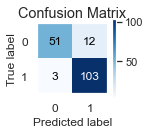

In [85]:
#ลองเปลี่ยน threshold = .5
threshold = .5                                   #default
y_pred_prob = model.predict_proba(X_test)[:,1] 
y_pred = y_pred_prob > threshold                  #predict เป็น 1 ถ้าค่าความเชื่อมั่นสูงกว่า threshold

print(classification_report(y_test, y_pred, target_names=['No','Yes']))

cm = confusion_matrix(y_test, y_pred)
print(cm)

import scikitplot as skplot
sns.set(rc={'figure.figsize':(2.2,2)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.tight_layout()
plt.savefig('th2_98_confmatrix',dpi=120)
plt.show()

              precision    recall  f1-score   support

          No       0.94      0.81      0.87        63
         Yes       0.90      0.97      0.93       106

    accuracy                           0.91       169
   macro avg       0.92      0.89      0.90       169
weighted avg       0.91      0.91      0.91       169

[[ 51  12]
 [  3 103]]


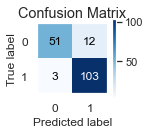

In [86]:
#ลองเปลี่ยน threshold = .98
threshold = .5                                   #ตั้งค่าให้แข็งมาก ทำให้ผล "เป็นมะเร็ง" ต้องมั่นใจแบบสุด ๆ จึงจะแสดงออกมา
y_pred_prob = model.predict_proba(X_test)[:,1] 
y_pred = y_pred_prob > threshold                  #predict เป็น 1 ถ้าค่าความเชื่อมั่นสูงกว่า threshold

print(classification_report(y_test, y_pred, target_names=['No','Yes']))

cm = confusion_matrix(y_test, y_pred)
print(cm)

import scikitplot as skplot
sns.set(rc={'figure.figsize':(2.2,2)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.tight_layout()
plt.savefig('th2_98_confmatrix',dpi=120)
plt.show()